# Proyecto 1 Mineria de datos

Se analizara el contexto economico y politico para poder encontrar estrategias apropiadas para poder invertir en la salud global

### Se importan librerias

In [174]:
# Se importan librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

### Se leen los archivos

In [175]:
# Se carga el archivo de datos
expenditure = pd.read_csv('Expenditure.csv', encoding='latin1')
Personnel = pd.read_csv('Personnel.csv', encoding='latin1')

## Limpieza de datos

Primer paso
Se establecen los encabezados correctos en Personnel y expenditure

In [176]:
# Primer paso de limpieza de datos
# Hacer que la primera fila sea el encabezado
expenditure.columns = expenditure.iloc[0]
expenditure = expenditure[1:]

Personnel.columns = Personnel.iloc[0]
Personnel = Personnel[1:]


Segundo paso
Se cambia el nombre de la columna Nan por country name en Personnel y expenditure

In [177]:
# Segundo paso de limpieza de datos
# Cambiar el nombre de la segunda columna (La cual no tiene nombre y cuando la imprimo me muestra NaN) por Country
expenditure = expenditure.rename(columns={expenditure.columns[1]: 'Country Name'})
Personnel = Personnel.rename(columns={Personnel.columns[1]: 'Country Name'})


Tercer paso de limpieza
Se preparan columnas number y per 1000 population en Personnel

In [178]:
# Remplazar parte de los valores de string en la columna Series
Personnel["Series"] = Personnel["Series"].str.replace("Health personnel: ", "")

#con regex extrae de forma unique los valores que estan entre parebtesis en series 
Series = Personnel["Series"].str.extract(r"\((.*?)\)", expand=False)

for serie in Series.unique():
    Personnel[serie] = 0
    Personnel.loc[Personnel["Series"].str.contains(serie), serie] = 1


Personnel['Series'] = Personnel['Series'].str.replace(' (per 1000 population)', '')
Personnel['Series'] = Personnel['Series'].str.replace(' (number)', '')

Cuarto Paso
Se corrigen los Values en base a su unidad en Personnel

In [179]:
# Convertir la columna "Value" a cadena antes de aplicar métodos .str
Personnel['Value'] = Personnel['Value'].astype(str)

# Aplicar los métodos .str para reemplazar los caracteres no deseados
Personnel['Value'] = Personnel['Value'].str.replace(',', '').str.replace(' ', '').str.replace('..', '0')

# Si number es 1, dividir value / 1000
Personnel["Value"] = Personnel["Value"].astype(float)
Personnel.loc[Personnel["number"] == 1, "Value"] = Personnel["Value"] / 1000


#eliminar categorias 
Personnel = Personnel.drop(columns=["per 1000 population", "number"])


Quinto paso
Se establece las categorias de profesion en Personnel

In [180]:
categorias = Personnel["Series"]
# Crear una lista para almacenar los elementos únicos
unique_elements = []

# Iterar sobre cada elemento único en la lista original
for i in categorias.unique():
    # Verificar si el elemento no contiene ninguna de las otras cadenas
    if not any(other in i for other in unique_elements):
        # Si no contiene ninguna de las otras cadenas, agregarlo a la lista de elementos únicos
        unique_elements.append(i)


for categoria in unique_elements:
    Personnel[categoria] = 0
    Personnel.loc[Personnel["Series"].str.contains(categoria), categoria] = 1

Personnel = Personnel.drop(columns=["Series"])
Personnel = Personnel.drop(columns=["Footnotes"])

Sexto paso
se unifican datos repetidos en Personnel

In [181]:
# Agrupar por las columnas mencionadas y sumar la columna 'Values'
Personnel = Personnel.groupby(['Country Name', 'Year', 'Source', 'Physicians', 'Pharmacists', 'Nurses and midwives', 'Dentists'])['Value'].sum().reset_index()

Septimo Paso
Se eliminan columnas consideradas innecesarias en Personnel

In [182]:

#eliminar columna source 
Personnel = Personnel.drop(columns=["Source"])

Octavo paso
Se establece las unidades del value a trabajar para expenditure

In [183]:
#con regex extrae de forma unique los valores que estan entre parebtesis en series 
Series = expenditure["Series"].str.extract(r"\((.*?)\)", expand=False)


for serie in Series.unique():
    expenditure[serie] = 0
    expenditure.loc[expenditure["Series"].str.contains(serie), serie] = 1

#eliminar columna series 
expenditure = expenditure.drop(columns=["Series"])



Noveno paso
Se eliminan las columnas innecesarias

In [184]:
#eliminar footnotes y source 
expenditure = expenditure.drop(columns=["Footnotes"])
expenditure = expenditure.drop(columns=["Source"])


# cast de value a float en expenditure
expenditure['Value'] = expenditure['Value'].astype(float)


Decimo paso
Se obtiene el dataframe final a trabajar

In [185]:
#Unificar tablas conforme region/country/area y year

# Unir los dos DataFrames
merged = pd.merge(expenditure, Personnel, on=['Country Name', 'Year'], how='inner')


#### Pesonnel Final

In [186]:
Personnel

,Country Name,Year,Physicians,Pharmacists,Nurses and midwives,Dentists,Value
0,Afghanistan,2001,0,1,0,0,0.525
1,Afghanistan,2001,1,0,0,0,4.304
2,Afghanistan,2005,0,0,1,0,15.530
3,Afghanistan,2005,0,1,0,0,0.900
4,Afghanistan,2008,0,0,0,1,0.382
...,...,...,...,...,...,...,...
2937,Zimbabwe,2015,1,0,0,0,2.708
2938,Zimbabwe,2020,0,0,0,1,0.234
2939,Zimbabwe,2020,0,0,1,0,33.792
2940,Zimbabwe,2020,0,1,0,0,1.700


#### expenditure final

In [187]:
expenditure

,Region/Country/Area,Country Name,Year,Value,% of GDP,% of total government expenditure
1,4,Afghanistan,2005,9.9,1,0
2,4,Afghanistan,2010,8.6,1,0
3,4,Afghanistan,2015,10.1,1,0
4,4,Afghanistan,2018,14.2,1,0
5,4,Afghanistan,2019,14.8,1,0
...,...,...,...,...,...,...
2258,716,Zimbabwe,2010,15.2,0,1
2259,716,Zimbabwe,2015,7.6,0,1
2260,716,Zimbabwe,2018,7.9,0,1
2261,716,Zimbabwe,2019,3.9,0,1


#### Merged final

In [188]:
merged

,Region/Country/Area,Country Name,Year,Value_x,% of GDP,% of total government expenditure,Physicians,Pharmacists,Nurses and midwives,Dentists,Value_y
0,4,Afghanistan,2005,9.9,1,0,0,0,1,0,15.530
1,4,Afghanistan,2005,9.9,1,0,0,1,0,0,0.900
2,4,Afghanistan,2010,8.6,1,0,0,1,0,0,0.814
3,4,Afghanistan,2010,8.6,1,0,1,0,0,0,7.101
4,4,Afghanistan,2015,10.1,1,0,0,0,0,1,0.123
...,...,...,...,...,...,...,...,...,...,...,...
3456,716,Zimbabwe,2015,7.6,0,1,1,0,0,0,2.708
3457,716,Zimbabwe,2020,5.2,0,1,0,0,0,1,0.234
3458,716,Zimbabwe,2020,5.2,0,1,0,0,1,0,33.792
3459,716,Zimbabwe,2020,5.2,0,1,0,1,0,0,1.700


## Analisis exploratorio

#### Tipos de datos

In [189]:
# dtypes de los dataframes
print("-----------Expenditure-----------")
print(expenditure.dtypes)
print("-----------Personnel-----------")
print(Personnel.dtypes)
print("-----------Merged-----------")
print(merged.dtypes.head(15))

-----------Expenditure-----------
0
Region/Country/Area                   object
Country Name                          object
Year                                  object
Value                                float64
% of GDP                               int64
% of total government expenditure      int64
dtype: object
-----------Personnel-----------
Country Name            object
Year                    object
Physicians               int64
Pharmacists              int64
Nurses and midwives      int64
Dentists                 int64
Value                  float64
dtype: object
-----------Merged-----------
Region/Country/Area                   object
Country Name                          object
Year                                  object
Value_x                              float64
% of GDP                               int64
% of total government expenditure      int64
Physicians                             int64
Pharmacists                            int64
Nurses and midwives         

#### Informacion general de Merged

In [190]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3461 entries, 0 to 3460
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Region/Country/Area                3461 non-null   object 
 1   Country Name                       3461 non-null   object 
 2   Year                               3461 non-null   object 
 3   Value_x                            3461 non-null   float64
 4   % of GDP                           3461 non-null   int64  
 5   % of total government expenditure  3461 non-null   int64  
 6   Physicians                         3461 non-null   int64  
 7   Pharmacists                        3461 non-null   int64  
 8   Nurses and midwives                3461 non-null   int64  
 9   Dentists                           3461 non-null   int64  
 10  Value_y                            3461 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 297.6+ 

#### Resumen estadistico

In [191]:
merged.describe()

,Value_x,% of GDP,% of total government expenditure,Physicians,Pharmacists,Nurses and midwives,Dentists,Value_y
count,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000,3461.000000
mean,8.645449,0.499278,0.500722,0.269864,0.212944,0.277665,0.239526,64.286469
std,4.362755,0.500072,0.500072,0.443953,0.409448,0.447912,0.426856,274.678443
min,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002000
25%,5.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.651000
50%,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.739000
75%,10.900000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,32.981000
max,31.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4712.017000


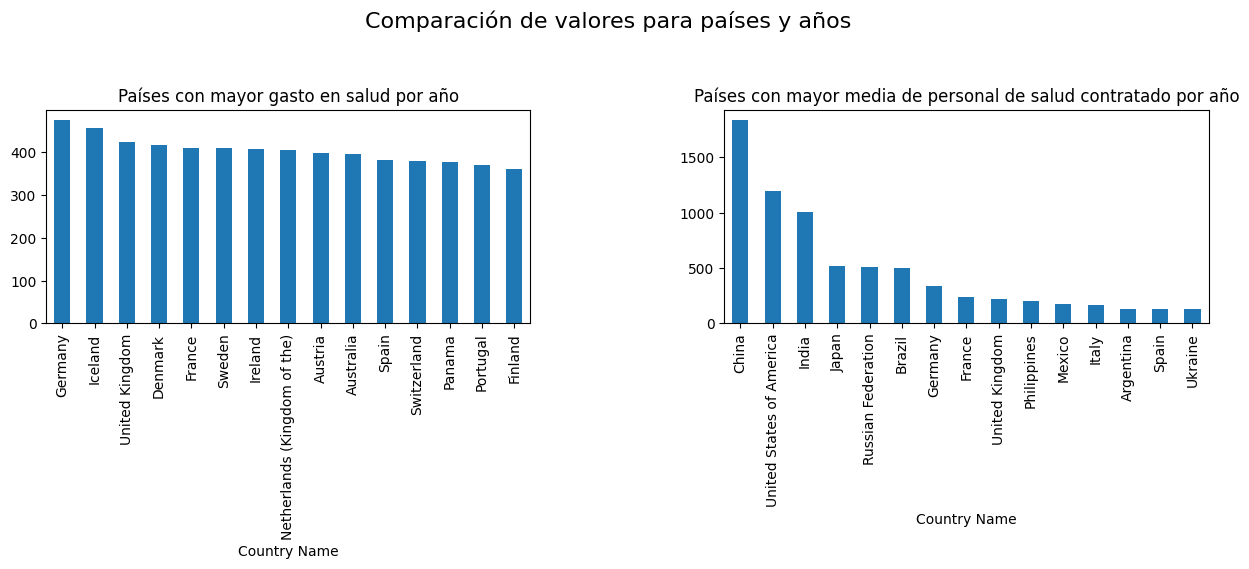

In [192]:
plt.figure(figsize=(15, 10))

# Primera figura: Países con mayor gasto en salud y personal de salud contratado
plt.subplot(3, 2, 1)
merged.groupby('Country Name')['Value_x'].sum().sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Países con mayor gasto en salud por año')

plt.subplot(3, 2, 2)
merged.groupby('Country Name')['Value_y'].mean().sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Países con mayor media de personal de salud contratado por año')


# Título general y ajustes
plt.suptitle('Comparación de valores para países y años', fontsize=16)
plt.subplots_adjust(hspace=0.3, wspace=0.4)

plt.show()

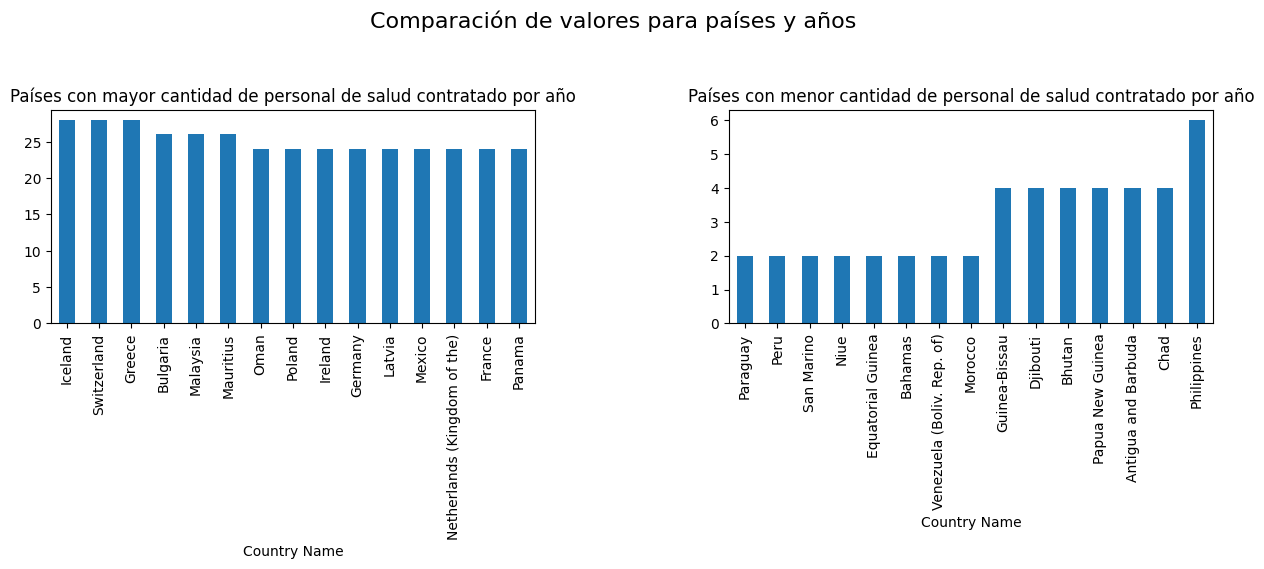

In [193]:
plt.figure(figsize=(15, 10))

# Segunda figura: Países con mayor y menor cantidad de personal de salud contratado
plt.subplot(3, 2, 1)
merged.groupby('Country Name')[['Physicians', 'Nurses and midwives', 'Dentists']].sum().sum(axis=1).sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Países con mayor cantidad de personal de salud contratado por año')

plt.subplot(3, 2, 2)
merged.groupby('Country Name')[['Physicians', 'Nurses and midwives', 'Dentists']].sum().sum(axis=1).sort_values(ascending=True).head(15).plot(kind='bar')
plt.title('Países con menor cantidad de personal de salud contratado por año')

plt.suptitle('Comparación de valores para países y años', fontsize=16)
plt.subplots_adjust(hspace=0.3, wspace=0.4)

plt.show()


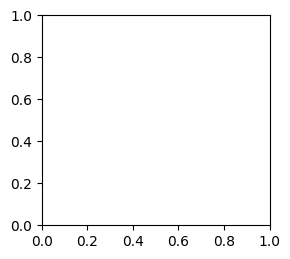

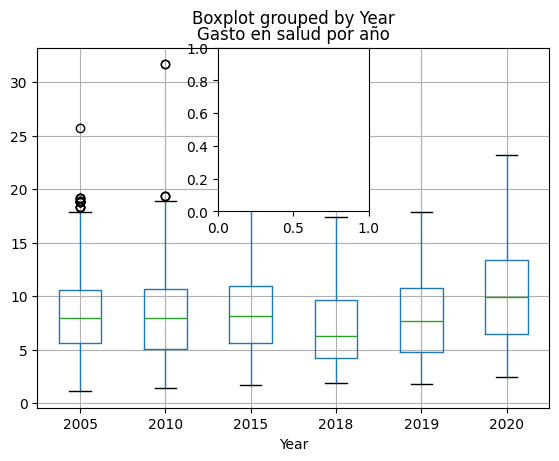

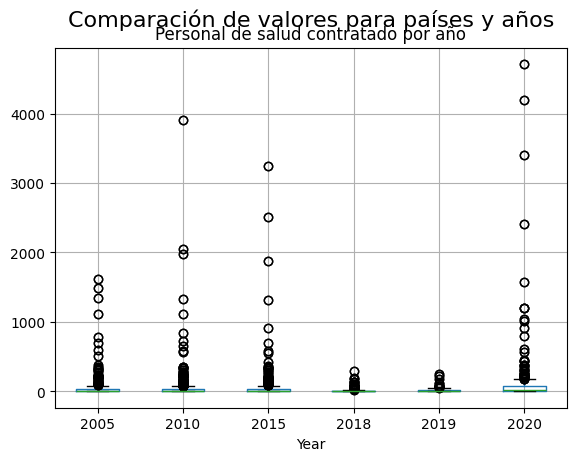

In [194]:
plt.figure(figsize=(10, 6))
# Tercera figura: Distribución de gasto y personal de salud por año
plt.subplot(2, 3, 1)
merged.boxplot(column='Value_x', by='Year')
plt.title('Gasto en salud por año')

plt.subplot(2, 3, 2)
merged.boxplot(column='Value_y', by='Year')
plt.title('Personal de salud contratado por año')

plt.suptitle('Comparación de valores para países y años', fontsize=16)
plt.subplots_adjust(hspace=0.3, wspace=0.4)

plt.show()

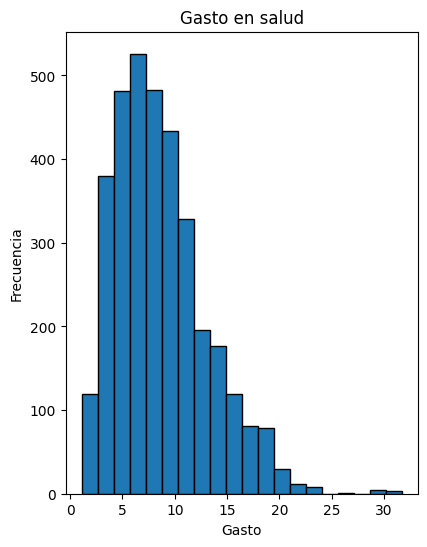

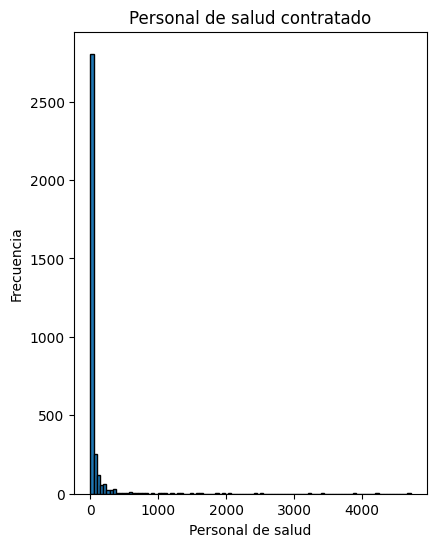

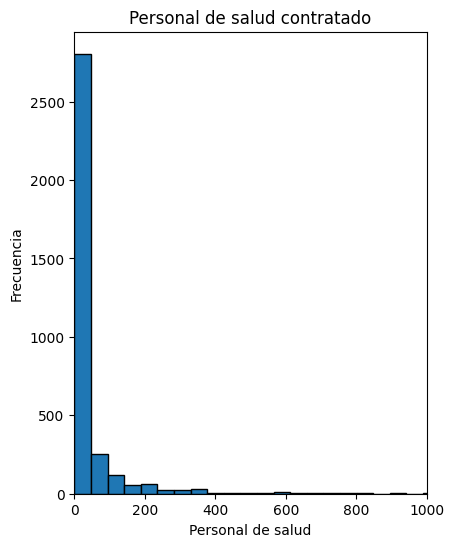

In [195]:
# Histograma para la variable 'Value_x'
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(merged['Value_x'], bins=20, edgecolor='black')
plt.title('Gasto en salud')
plt.xlabel('Gasto')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para la variable 'Value_y'
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 2)
plt.hist(merged['Value_y'], bins=100, edgecolor='black')
plt.title('Personal de salud contratado')
plt.xlabel('Personal de salud')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 2)
plt.hist(merged['Value_y'], bins=100, edgecolor='black')
plt.title('Personal de salud contratado')
plt.xlabel('Personal de salud')
plt.ylabel('Frecuencia')
plt.xlim(0, 1000)
plt.show()

#### Analisis de correlación

In [196]:
# generar analisis de correlacion
datos_num = merged.select_dtypes(include=[float, int])
correlacion = datos_num.corr()

correlacion


,Value_x,% of GDP,% of total government expenditure,Physicians,Pharmacists,Nurses and midwives,Dentists,Value_y
Value_x,1.000000,-0.431301,0.431301,-0.027658,0.021536,-0.017671,0.026651,0.073606
% of GDP,-0.431301,1.000000,-1.000000,-0.000424,0.000046,0.000251,0.000134,0.000289
% of total government expenditure,0.431301,-1.000000,1.000000,0.000424,-0.000046,-0.000251,-0.000134,-0.000289
Physicians,-0.027658,-0.000424,0.000424,1.000000,-0.316229,-0.376932,-0.341197,0.006152
Pharmacists,0.021536,0.000046,-0.000046,-0.316229,1.000000,-0.322494,-0.291920,-0.082805
Nurses and midwives,-0.017671,0.000251,-0.000251,-0.376932,-0.322494,1.000000,-0.347957,0.173887
Dentists,0.026651,0.000134,-0.000134,-0.341197,-0.291920,-0.347957,1.000000,-0.109436
Value_y,0.073606,0.000289,-0.000289,0.006152,-0.082805,0.173887,-0.109436,1.000000


#### Grafica de correlación

<Figure size 1000x600 with 0 Axes>

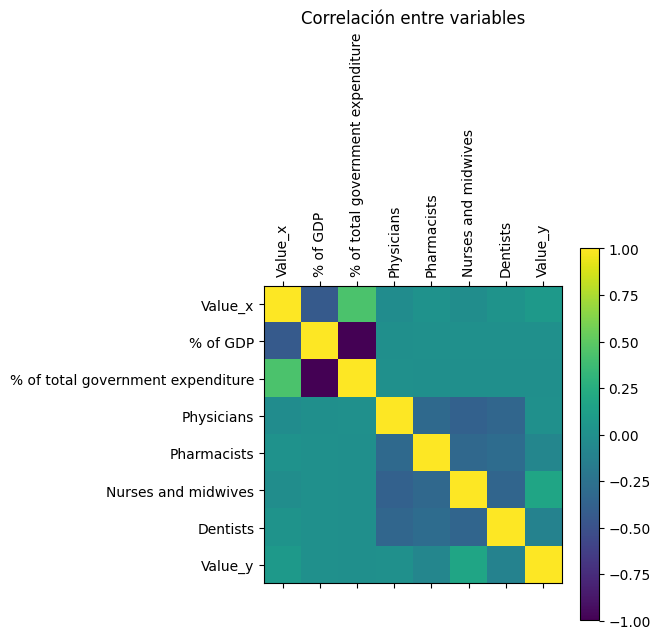

In [197]:
# Grafico de correlacion
plt.figure(figsize=(10, 6))
plt.matshow(correlacion, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(correlacion.columns)), correlacion.columns, rotation=90)
plt.yticks(range(len(correlacion.columns)), correlacion.columns)
plt.title('Correlación entre variables')
plt.show()

#### Variables categoricas

#### Tabla de frecuencia

In [198]:
# tabla de frecuencia
data_cat = merged.select_dtypes(include=[object])
tabla_frecuencia = data_cat["Country Name"].value_counts()

tabla_frecuencia

Country Name
Greece                          38
Iceland                         38
Switzerland                     36
Oman                            32
Netherlands (Kingdom of the)    32
                                ..
Peru                             2
Venezuela (Boliv. Rep. of)       2
Paraguay                         2
Niue                             2
Morocco                          2
Name: count, Length: 188, dtype: int64

#### Tabla de proporción

In [199]:
# Tabla de proporción
tabla_proporcion = data_cat["Country Name"].value_counts(normalize=True)

tabla_proporcion

Country Name
Greece                          0.010979
Iceland                         0.010979
Switzerland                     0.010402
Oman                            0.009246
Netherlands (Kingdom of the)    0.009246
                                  ...   
Peru                            0.000578
Venezuela (Boliv. Rep. of)      0.000578
Paraguay                        0.000578
Niue                            0.000578
Morocco                         0.000578
Name: proportion, Length: 188, dtype: float64

#### Clustering

In [200]:
merged

,Region/Country/Area,Country Name,Year,Value_x,% of GDP,% of total government expenditure,Physicians,Pharmacists,Nurses and midwives,Dentists,Value_y
0,4,Afghanistan,2005,9.9,1,0,0,0,1,0,15.530
1,4,Afghanistan,2005,9.9,1,0,0,1,0,0,0.900
2,4,Afghanistan,2010,8.6,1,0,0,1,0,0,0.814
3,4,Afghanistan,2010,8.6,1,0,1,0,0,0,7.101
4,4,Afghanistan,2015,10.1,1,0,0,0,0,1,0.123
...,...,...,...,...,...,...,...,...,...,...,...
3456,716,Zimbabwe,2015,7.6,0,1,1,0,0,0,2.708
3457,716,Zimbabwe,2020,5.2,0,1,0,0,0,1,0.234
3458,716,Zimbabwe,2020,5.2,0,1,0,0,1,0,33.792
3459,716,Zimbabwe,2020,5.2,0,1,0,1,0,0,1.700


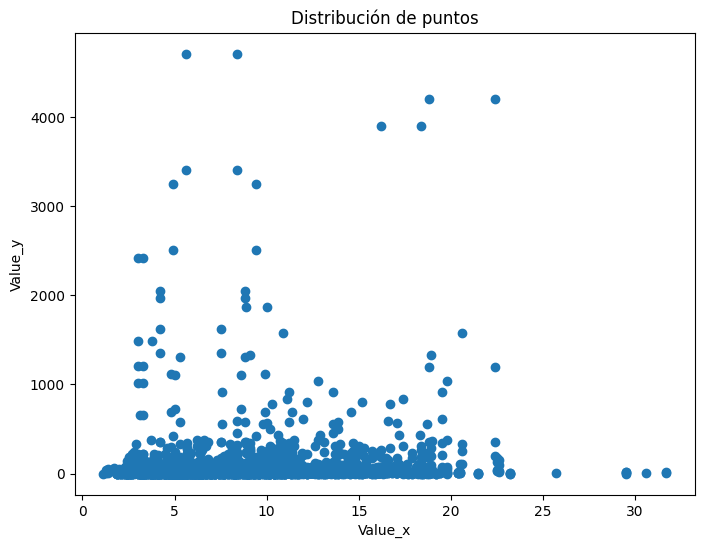

In [201]:
plt.figure(figsize=(8, 6))
plt.scatter(merged['Value_x'], merged['Value_y'])
plt.xlabel('Value_x')
plt.ylabel('Value_y')
plt.title('Distribución de puntos')
plt.show()

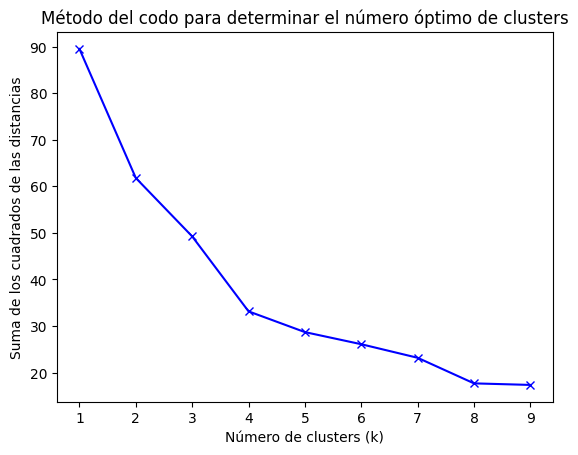

cluster
0    3375
2      60
1      16
3      10
Name: count, dtype: int64

In [202]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

distortions = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(merged[['Value_x', 'Value_y']])
    distortions.append(sum(np.min(cdist(merged[['Value_x', 'Value_y']], kmeans.cluster_centers_, 'euclidean'), axis=1)) / merged.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de los cuadrados de las distancias')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.show()
kmeans = KMeans(n_clusters=4)
kmeans.fit(merged[['Value_x', 'Value_y']])
merged['cluster'] = kmeans.predict(merged[['Value_x', 'Value_y']])
merged['cluster'].value_counts()


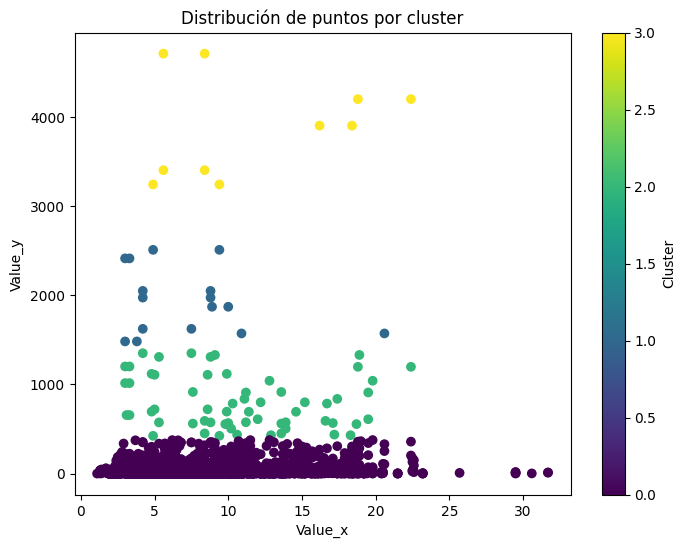

In [204]:

plt.figure(figsize=(8, 6))
plt.scatter(merged['Value_x'], merged['Value_y'], c=merged['cluster'])
plt.xlabel('Value_x')
plt.ylabel('Value_y')
plt.title('Distribución de puntos por cluster')
plt.colorbar(label='Cluster')
plt.show()
